<a href="https://colab.research.google.com/github/AdityaKaushikkk/ml/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
mat = pd.read_csv("/content/student-mat.csv", sep=';')
por = pd.read_csv("/content/student-por.csv", sep=';')


In [4]:
merge_keys = ["school", "sex", "age", "address", "famsize", "Pstatus",
              "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]
students = pd.merge(mat, por, on=merge_keys, suffixes=('_mat', '_por'))


In [5]:
students['G3_avg'] = (students['G3_mat'] + students['G3_por']) / 2

In [6]:
drop_cols = ['G1_mat', 'G2_mat', 'G3_mat', 'G1_por', 'G2_por', 'G3_por']
students.drop(columns=drop_cols, inplace=True)

In [7]:
students_encoded = pd.get_dummies(students, drop_first=True)

In [8]:
X = students_encoded.drop("G3_avg", axis=1)
y = students_encoded["G3_avg"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [11]:
y_pred = model.predict(X_test)


In [12]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 2.89
R² Score: 0.28


In [13]:
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)


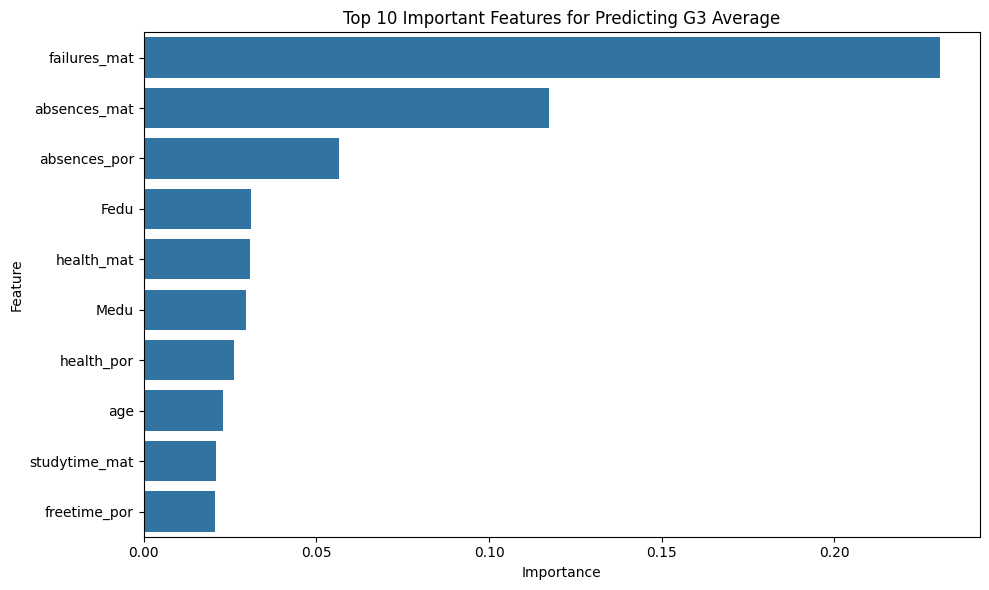

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Important Features for Predicting G3 Average")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()